# 1. Introduction 
Here I explore the Ames Housing Dataset, which can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). The dataset contains data for 1460 different houses in Ames Iowa. The task is to predict the house price given a combination of the 79 predictor variables available in the dataset.

<b> Let's Begin! </b>

# 2. Import and data load

In [176]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
import xgboost as xgb
from xgboost import plot_importance
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#file_path = '/home/ec2-user/data/housing_prices/train.csv'
file_path = '/Users/david/Documents/ipython/housing_prices/train.csv'
data = pd.read_csv(file_path) 

# 3. Descriptives

In [3]:
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [5]:
# column info
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

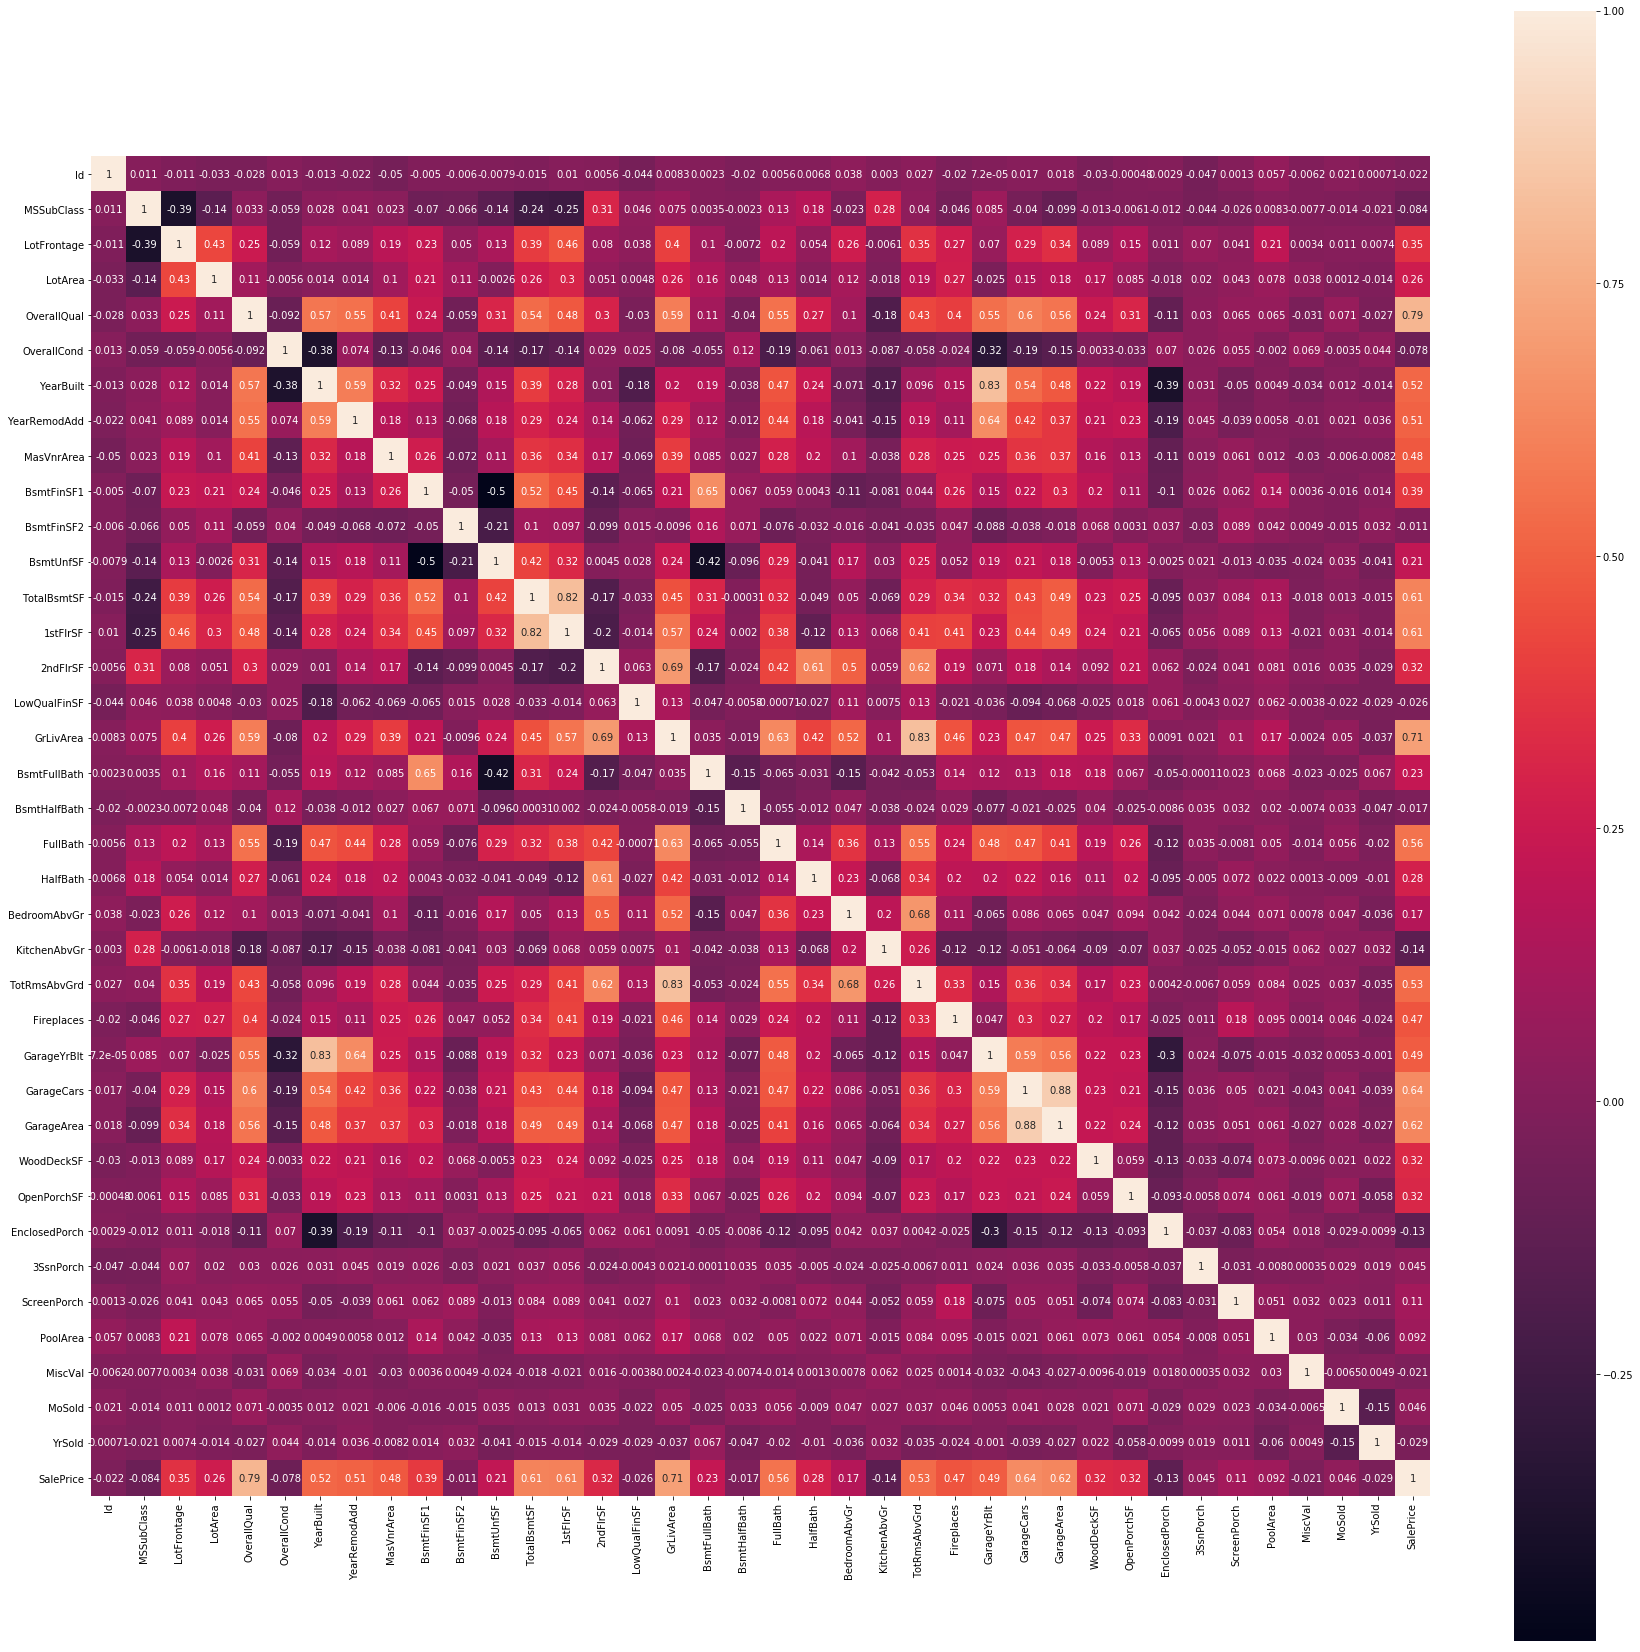

In [6]:
# Create a heatmap of the numeric variables

numeric_vars = data.select_dtypes(exclude=['object'])

plt.figure(figsize=(30,30))
foo = sns.heatmap(numeric_vars.corr(), square=True, annot=True)

### We learn:
- SalePrice is highly correlated with a number of variables, including, OverallQual, YearBuilt, YearRemodAdd, GarageArea, GrLivArea and others

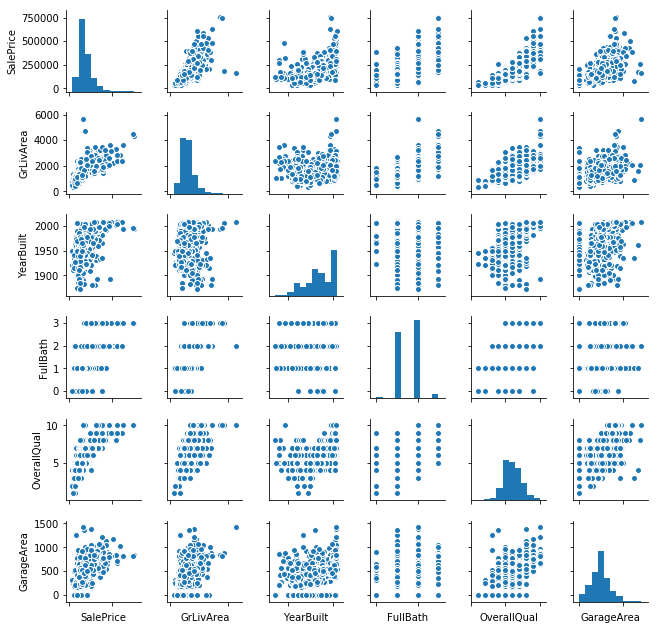

In [7]:
# Let's look at a pairplot of a few of the variables found to be highly correlated with SalePrice in more detail.

cols = ['SalePrice','GrLivArea','YearBuilt', 'FullBath', 'OverallQual', 'GarageArea']
g = sns.pairplot(data=data, vars=cols, size=1.5)
g.set(xticklabels=[])

### We learn:
- we see very clear relationships between SalePrice and GrLivArea and OverallQual
- For the other variables, particularly the categorical ones, the relationship is still visible but less clear
- For example, there are some new buildings that fetch a low price and some older buildings that fetch a relatively high price. This is to be expected of course, as there could be new, more simple houses and older, more luxusious ones, for example. 

# 4. Modelling
Let's begin with a simple decision tree.

In [8]:
# Model: Decision Tree and a few numerical predictors
y = data.SalePrice
predictors = ['LotArea', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = data[predictors]

# split the data into training and validation
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

# Define and fit model
model = DecisionTreeRegressor()
model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

32582.33424657534
Making predictions for the following 5 houses:
   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  
The predictions are
[208500. 175500. 235000. 140000. 290000.]


### We learn:
- With decision tree algorithm we achieve a MAE of about 33k USD

In [61]:
# Let's now try a Random Forest with the same predictors

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
val_predictions = forest_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

24143.9338813


### We learn
- without any tuning, using Random Forest, MAE falls quite substantially compared to simple decision tree

## 4a. Impute missing values
Now let's get rid of missing values in the numeric variables so we can use more of them in the model. As an easy first step, we set missings to the mean for each respective column.

In [ ]:
print(data.isnull().sum())

In [62]:
target = data.SalePrice
predictors = data.drop(['SalePrice'], axis=1)

# Use only numeric predictors
numeric_predictors = predictors.select_dtypes(exclude=['object'])

X_train, X_test, y_train, y_test = train_test_split(numeric_predictors, 
                                                    target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

## Get Model Score from Imputation
my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

Mean Absolute Error from Imputation:
19716.5401826


### We learn:
- using all columns and imputing those with missings, we again reduced MAE to about 20k USD

In [64]:
#### Now let's try our luck with XGBoost, a very powerful algorithm for regression.

y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

## build model
my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

## make predictions
predictions = my_model.predict(test_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 16956.444092465754


### We learn:
- with XGB, without tuning, MAE drops as low as 17K USD

In [11]:
## Tuning XGB

# use 100 trees and learning rate of 0.05
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.1)
my_model.fit(train_X, train_y , early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

## make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 15964.349743150686


### We learn: 
- Tuning the number of trees and the learning rate does not make much difference, the MAE stays at about 16k-17k USD

In [70]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 5. Summary
- We have managed to achieve a Mean Absolute Error of 16-17K USD in our predictions. 
- With a mean SalePrice of 181,000 USD, our Mean Absolute Error is about 9% of the mean SalePrice. That is quite good for a start. 
- Next step will be to bring that down further by doing some smart feature engineering, changing the variables we include in the model and by including object variables (through one-hot-encoding).

In [105]:
cols = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
        'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

y = data.SalePrice
X = data[cols]
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)
predictions = my_model.predict(test_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 15838.838891267123


# Feature Importance

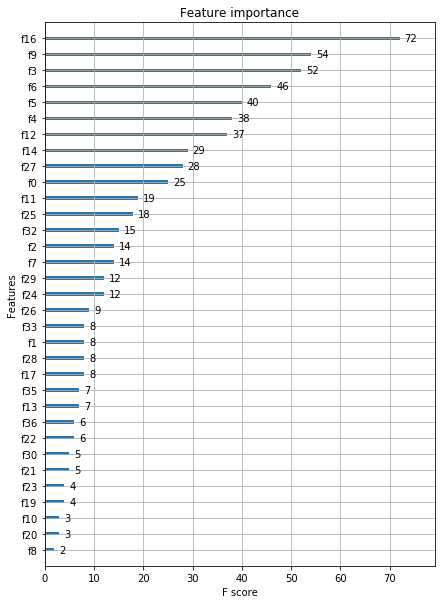

In [111]:
# Feature Importance

# print feature importance
# print(my_model.feature_importances_)

# plot with bar chart
# plt.bar(range(len(my_model.feature_importances_)), my_model.feature_importances_)
# plt.show()

# plot with xgb's own plot_importance
fig, ax = plt.subplots(figsize=(7, 10))
plot_importance(my_model, ax=ax)
plt.show()

In [114]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

### We learn:
- Based on feature importance, we can remove MasVnrArea, BsmtFullBath, HalfBath, FullBath, TotRmsAbvGrd, GarageCars (score < 10)


- Goal: Select Features that get a similar MAE to all Features, thus increasing Parsimony. 


# One-hot encoding

In [277]:
# Get all object columns that don't have missings. These we will one-hot-encode. 

objects_a = data.select_dtypes(include=['object']).isnull().sum()
cat_pred_cols = objects[(objects == 0)].index.values
#predictors_before_ohe = data[cat_pred_cols]

all_cols = np.append(cat_pred_cols, data.drop(['SalePrice', 'Id'], axis=1).select_dtypes(exclude=['object']).columns.values)
predictors_before_ohe = data[all_cols]

# Apply one-hot encoding
predictors_ohe = pd.get_dummies(predictors_before_ohe)

Mean Absolute Error : 17590.280458047946


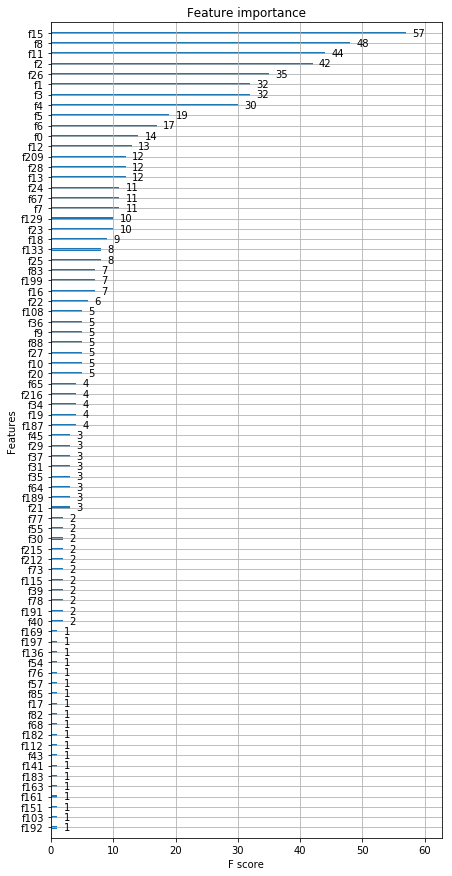

In [337]:
y = data.SalePrice
X = predictors_ohe
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

my_model = XGBRegressor()

my_model = XGBRegressor()
my_model.fit(train_X, train_y, verbose=False)
predictions = my_model.predict(test_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))


# plot with xgb's own plot_importance
fig, ax = plt.subplots(1,1,figsize=(7,15))
plot_importance(my_model, ax=ax)
plt.show()


In [418]:
y = data.SalePrice
X = predictors_ohe
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25)
feature_names = X.columns.values

params = {
#'booster':'gbtree',
'obj':'reg:linear',
#'max_depth':6,
'min_child_weight':1,
#'early_stopping_rounds':5,
'eta':0.3}

num_round = 500

eval_set = xgb.DMatrix(test_X, test_y)
#[(test_X, test_y)]

dmatrix = xgb.DMatrix(train_X, train_y, feature_names=feature_names)
my_model = xgb.train(params, dmatrix, num_round, evals=eval_set)
dtest = xgb.DMatrix(test_X, feature_names=feature_names)
predictions = my_model.predict(dtest)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

fig, ax = plt.subplots(1,1,figsize=(7,40))
plot_importance(my_model, ax=ax)
plt.show()


TypeError: 'DMatrix' object is not iterable

# Ensemble / Stacking

In [414]:
# monitor training performance# 
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# load data

# split data into X and y
X = predictors_ohe
Y = data.SalePrice
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
print("Mean Absolute Error : " + str(mean_absolute_error(y_test, predictions)))

[0]	validation_0-mae:175183
Will train until validation_0-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:166679
[2]	validation_0-mae:158515
[3]	validation_0-mae:150761
[4]	validation_0-mae:143309
[5]	validation_0-mae:136222
[6]	validation_0-mae:129550
[7]	validation_0-mae:123144
[8]	validation_0-mae:117145
[9]	validation_0-mae:111390
[10]	validation_0-mae:105905
[11]	validation_0-mae:100636
[12]	validation_0-mae:95697.3
[13]	validation_0-mae:91016.6
[14]	validation_0-mae:86619
[15]	validation_0-mae:82477.7
[16]	validation_0-mae:78548.7
[17]	validation_0-mae:74806
[18]	validation_0-mae:71341.3
[19]	validation_0-mae:68011.8
[20]	validation_0-mae:64890.2
[21]	validation_0-mae:61941.4
[22]	validation_0-mae:59153.6
[23]	validation_0-mae:56453.7
[24]	validation_0-mae:54022.2
[25]	validation_0-mae:51731.8
[26]	validation_0-mae:49525.7
[27]	validation_0-mae:47478.7
[28]	validation_0-mae:45559.7
[29]	validation_0-mae:43781.3
[30]	validation_0-mae:42087.6
[31]	validation_0-mae:40528.2
[3

[268]	validation_0-mae:16489.6
[269]	validation_0-mae:16497.1
[270]	validation_0-mae:16494.3
[271]	validation_0-mae:16488.6
[272]	validation_0-mae:16480.7
[273]	validation_0-mae:16485
[274]	validation_0-mae:16480.9
[275]	validation_0-mae:16484.3
[276]	validation_0-mae:16485.5
[277]	validation_0-mae:16480.6
[278]	validation_0-mae:16480.2
[279]	validation_0-mae:16476.5
[280]	validation_0-mae:16477.4
[281]	validation_0-mae:16480.3
[282]	validation_0-mae:16476.1
[283]	validation_0-mae:16471.6
[284]	validation_0-mae:16464.3
[285]	validation_0-mae:16459.3
[286]	validation_0-mae:16451.5
[287]	validation_0-mae:16453.8
[288]	validation_0-mae:16449.6
[289]	validation_0-mae:16439.8
[290]	validation_0-mae:16437.4
[291]	validation_0-mae:16431.2
[292]	validation_0-mae:16434.1
[293]	validation_0-mae:16437.2
[294]	validation_0-mae:16434.7
[295]	validation_0-mae:16430.4
[296]	validation_0-mae:16433.9
[297]	validation_0-mae:16428.1
[298]	validation_0-mae:16418.1
[299]	validation_0-mae:16420.8
[300]	vali